In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

# 1. Introduction

## 1.1 Business Problem

FLO aims to outline a roadmap for its sales and marketing endeavors. In order for the company to formulate medium to long-term plans effectively, it is essential to anticipate the potential value that current customers will contribute to the company in the future.

## 1.2 Dataset Story

The dataset consists of information obtained from the historical shopping behaviors of customers who engaged in OmniChannel (both online and offline shopping) for their latest purchases from FLO during the years 2020-2021.

## 1.3 Features

- `master_id` - Unique customer identifier
- `order_channel` - Indication of the platform used for shopping (Android, iOS, Desktop, Mobile)
- `last_order_channel` - The channel used for the most recent purchase
- `first_order_date` - Date of the customer's initial purchase
- `last_order_date` - Date of the customer's most recent purchase
- `last_order_date_online` - Date of the customer's last online purchase
- `last_order_date_offline` - Date of the customer's last offline purchase
- `order_num_total_ever_online` - Total number of purchases made online by the customer
- `order_num_total_ever_offline` - Total number of purchases made offline by the customer
- `customer_value_total_ever_offline` - Total amount spent by the customer in offline purchases
- `customer_value_total_ever_online` - Total amount spent by the customer in online purchases
- `interested_in_categories_12` - List of categories in which the customer has made purchases in the last 12 months

# 2. Data Handling

## 2.1 Loading Data

In [2]:
# Load the dataset
customers = pd.read_csv('flo_data_20k.csv')

In [3]:
# Display the first few rows
customers.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[WOMEN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[MEN, KIDS, WOMEN, SPORTSWEAR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[MEN, WOMEN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[KIDS_SPORTSWEAR, KIDS]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[SPORTSWEAR]


## 2.2 Inspecting Data

In [4]:
# Display basic statistics about the dataset
customers.describe()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
count,19945.000000,19945.000000,19945.000000,19945.000000
mean,3.110855,1.913913,253.922597,497.321690
std,4.225647,2.062880,301.532853,832.601886
min,1.000000,1.000000,10.000000,12.990000
25%,1.000000,1.000000,99.990000,149.980000
50%,2.000000,1.000000,179.980000,286.460000
75%,4.000000,2.000000,319.970000,578.440000
max,200.000000,109.000000,18119.140000,45220.130000


In [5]:
# Display information about the dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [6]:
# Identify columns with null values
customers.isnull().any()

master_id                            False
order_channel                        False
last_order_channel                   False
first_order_date                     False
last_order_date                      False
last_order_date_online               False
last_order_date_offline              False
order_num_total_ever_online          False
order_num_total_ever_offline         False
customer_value_total_ever_offline    False
customer_value_total_ever_online     False
interested_in_categories_12          False
dtype: bool

In [7]:
# Get the number of unique values in each column
customers.nunique()

master_id                            19945
order_channel                            4
last_order_channel                       5
first_order_date                      2465
last_order_date                        366
last_order_date_online                1743
last_order_date_offline                738
order_num_total_ever_online             57
order_num_total_ever_offline            32
customer_value_total_ever_offline     6097
customer_value_total_ever_online     11292
interested_in_categories_12             32
dtype: int64

## 2.3 Data Cleaning and Preprocessing

In [8]:
def handle_outliers_with_thresholds(df, col, alpha=0.25):
    """
    Handle outliers in a DataFrame column by replacing values outside the specified quantile range.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data.
    - col (str): The column name for which outliers will be handled.
    - alpha (float, optional): The significance level for calculating quantiles. Defaults to 0.25.

    Returns:
    Tuple[float, float]: Lower and upper bounds for the specified column after handling outliers.
    """
    # Calculate the lower and upper quantiles based on the specified alpha
    q1 = df[col].quantile(alpha)
    q3 = df[col].quantile(1 - alpha)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace values below the lower bound with the lower bound
    df.loc[(df[col] < lower_bound), col] = lower_bound

    # Replace values above the upper bound with the upper bound
    df.loc[(df[col] > upper_bound), col] = upper_bound

    return lower_bound, upper_bound


# Outlier handling for selected columns
for col in ['order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_online',
            'customer_value_total_ever_offline']:
    handle_outliers_with_thresholds(customers, col, alpha=0.01)

customers.describe().T

In [9]:
# Calculate total order numbers and customer values
customers['order_num_total'] = customers['order_num_total_ever_online'] + customers['order_num_total_ever_offline']
customers['customer_value_total'] = customers['customer_value_total_ever_online'] + customers[
    'customer_value_total_ever_offline']

In [10]:
# Convert number of order columns to int format
num_order_cols = customers.columns[customers.columns.str.contains('order_num')]
customers[num_order_cols] = customers[num_order_cols].astype(int)

# Convert date columns to datetime format
date_cols = customers.columns[customers.columns.str.contains('date')]
customers[date_cols] = customers[date_cols].apply(pd.to_datetime)

# Check conversion
customers[num_order_cols.append(date_cols)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   order_num_total_ever_online   19945 non-null  int64         
 1   order_num_total_ever_offline  19945 non-null  int64         
 2   order_num_total               19945 non-null  int64         
 3   first_order_date              19945 non-null  datetime64[ns]
 4   last_order_date               19945 non-null  datetime64[ns]
 5   last_order_date_online        19945 non-null  datetime64[ns]
 6   last_order_date_offline       19945 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(3)
memory usage: 1.1 MB


In [11]:
# Set analysis date
analysis_date = customers['last_order_date'].max() + pd.Timedelta(days=7)

In [12]:
# Calculate CLV metrics
clv = pd.DataFrame()
clv['customer_id'] = customers['master_id']
clv['recency_clv_weekly'] = (customers['last_order_date'] - customers['first_order_date']).dt.days / 7
clv['t_weekly'] = (analysis_date - customers['first_order_date']).dt.days / 7
clv['frequency'] = customers['order_num_total']
clv['monetary_clv_avg'] = customers['customer_value_total'] / clv['frequency']

In [13]:
# Fit Beta-Geometric model to customer data
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(
    clv['frequency'],
    clv['recency_clv_weekly'],
    clv['t_weekly']
)

<lifetimes.BetaGeoFitter: fitted with 19945 subjects, a: 0.00, alpha: 77.28, b: 0.00, r: 3.69>

In [14]:
# Predict expected sales for the next 6 months
clv['exp_sales_6_months'] = bgf.predict(
    24,
    clv['frequency'],
    clv['recency_clv_weekly'],
    clv['t_weekly']
)

# Sort the DataFrame by expected sales in descending order and display the top entries
clv.sort_values('exp_sales_6_months', ascending=False).head()

,customer_id,recency_clv_weekly,t_weekly,frequency,monetary_clv_avg,exp_sales_6_months
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.714286,68.000000,52,166.215788,9.198911
15611,4a7e875e-e6ce-11ea-8f44-000d3a38a36f,39.714286,40.714286,29,165.297586,6.647996
8328,1902bf80-0035-11eb-8341-000d3a38a36f,28.857143,34.000000,25,97.439600,6.186439
19538,55d54d9e-8ac7-11ea-8ec0-000d3a38a36f,52.571429,59.428571,31,228.530000,6.089064
14373,f00ad516-c4f4-11ea-98f7-000d3a38a36f,38.000000,47.142857,27,141.354815,5.918750


In [15]:
# Fit Gamma-Gamma model to customer monetary data
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(clv['frequency'], clv['monetary_clv_avg'])

# Calculate expected average value for each customer
clv['exp_average_value'] = ggf.conditional_expected_average_profit(
    clv['frequency'],
    clv['monetary_clv_avg']
)

In [16]:
# Calculate 6-month CLV
clv['clv'] = ggf.customer_lifetime_value(
    bgf,
    clv['frequency'],
    clv['recency_clv_weekly'],
    clv['t_weekly'],
    clv['monetary_clv_avg'],
    time=6,
    freq='W',
    discount_rate=0.01
)

In [17]:
# Create customer segments based on CLV
clv['segment'] = pd.qcut(clv['clv'], 5, ['E', 'D', 'C', 'B', 'A'])

In [18]:
def categorize_columns(df, cat_th=10, high_card_th=20):
    """
    Categorizes columns in a DataFrame based on specified thresholds.

    Parameters:
    - df: DataFrame
    - cat_thresh: Threshold for considering a column as categorical (default is 10)
    - high_card_thresh: Threshold for considering a categorical column as having high cardinality (default is 20)

    Returns:
    - cat_cols: List of categorical columns
    - num_cols: List of numerical columns
    - high_card_cat_cols: List of categorical columns with high cardinality
    """

    # Identify categorical columns with high cardinality
    high_card_cols = [col for col in df.columns if
                      df[col].dtype in ["category", "object"] and df[col].nunique() > high_card_th]

    # Identify numerical columns that are treated as categorical
    num_but_cat_cols = [col for col in df.columns if
                        df[col].dtype in ["float64", "int64"] and df[col].nunique() < cat_th]

    # Identify categorical columns
    cat_cols = [col for col in df.columns if
                (df[col].dtype in ["category", "object", "bool"] and col not in high_card_cols) or
                (col in num_but_cat_cols)]

    # Identify numerical columns
    num_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"] and col not in cat_cols]

    # Print dataset overview
    print(f"Dataset Overview:")
    print(f" - Total Columns: {df.shape[1]}")
    print(f" - Numerical Columns: {len(num_cols)}")
    print(f" - Numerical Columns Treated as Categorical: {len(num_but_cat_cols)}")
    print(f" - Categorical Columns: {len(cat_cols)}")
    print(f" - Columns with High Cardinality: {len(high_card_cols)}")

    return cat_cols, num_cols, high_card_cols


# Categorize columns of the dataset
cat_cols, num_cols, high_card_cols = categorize_columns(clv)

Dataset Overview:
 - Total Columns: 9
 - Numerical Columns: 7
 - Numerical Columns Treated as Categorical: 0
 - Categorical Columns: 1
 - Columns with High Cardinality: 1


# 3. Data Visualization

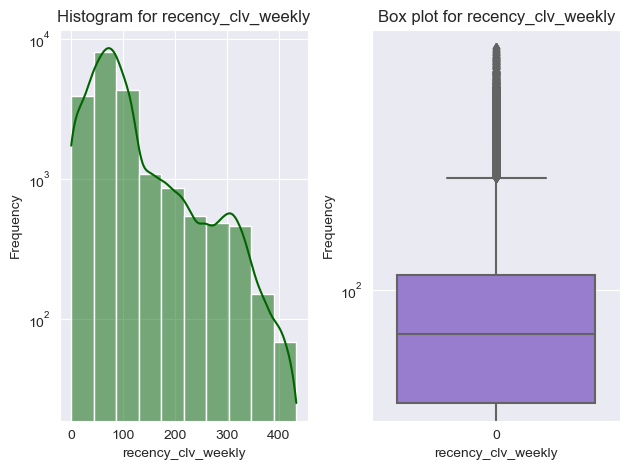

72.000000     45
76.000000     43
83.857143     42
64.714286     42
79.142857     42
              ..
433.000000     1
218.428571     1
305.857143     1
418.857143     1
293.428571     1
Name: recency_clv_weekly, Length: 2398, dtype: int64


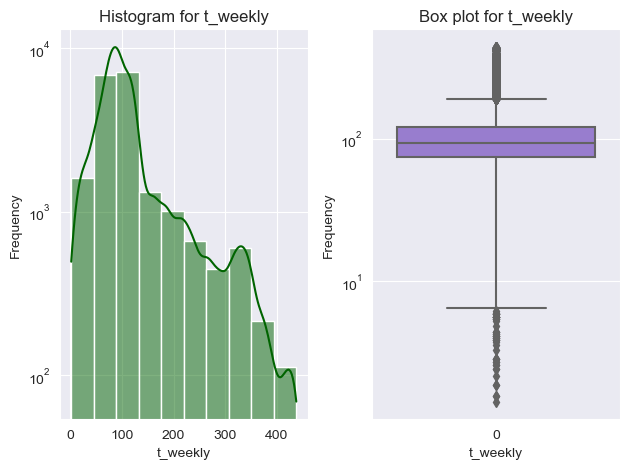

120.142857    80
119.142857    79
92.142857     76
82.000000     73
90.142857     71
              ..
276.428571     1
255.714286     1
330.857143     1
219.000000     1
379.142857     1
Name: t_weekly, Length: 2465, dtype: int64


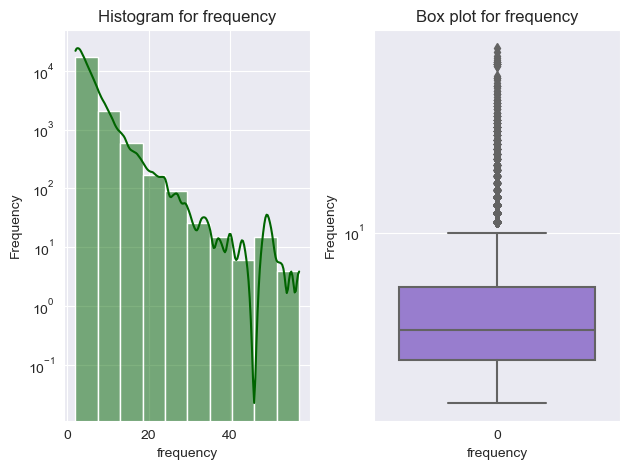

2     4717
3     4377
4     3127
5     2145
6     1515
7     1053
8      693
9      529
10     390
11     279
12     191
13     165
14     140
15      87
16      78
17      73
18      58
19      44
20      35
21      35
24      30
22      29
23      28
27      16
26      14
29      11
25      11
28       9
49       8
30       7
34       6
33       6
35       4
40       4
31       4
50       4
37       3
32       3
43       3
38       2
48       2
39       1
57       1
53       1
36       1
55       1
51       1
52       1
42       1
41       1
44       1
Name: frequency, dtype: int64


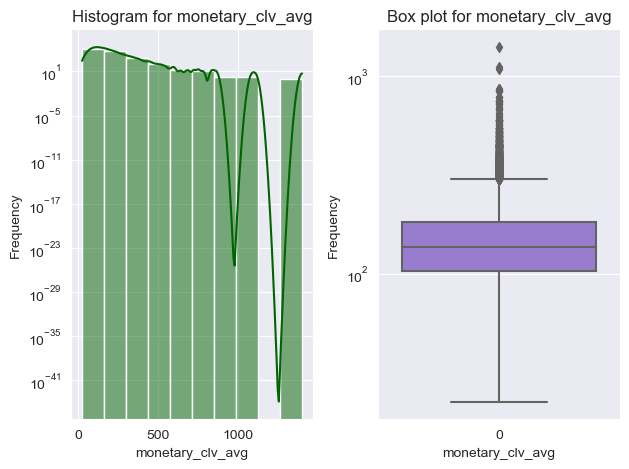

79.990000     32
119.990000    29
124.990000    26
89.990000     26
129.990000    25
              ..
132.370000     1
111.893333     1
77.983333      1
110.886000     1
168.295000     1
Name: monetary_clv_avg, Length: 17001, dtype: int64


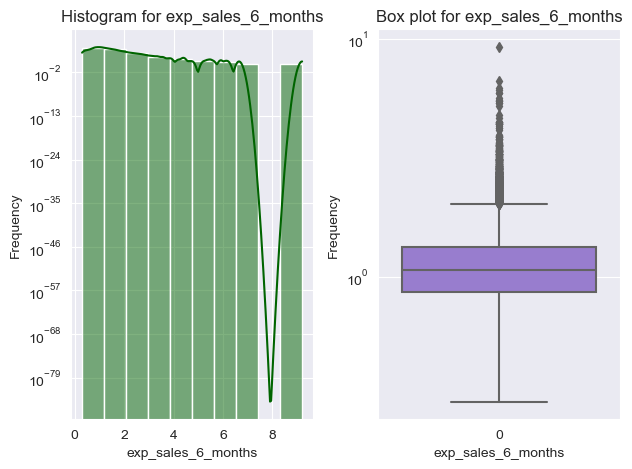

0.952619    23
1.025698    22
0.987809    21
0.939172    20
1.020109    19
            ..
0.747952     1
0.460624     1
1.567582     1
1.560588     1
1.895796     1
Name: exp_sales_6_months, Length: 8498, dtype: int64


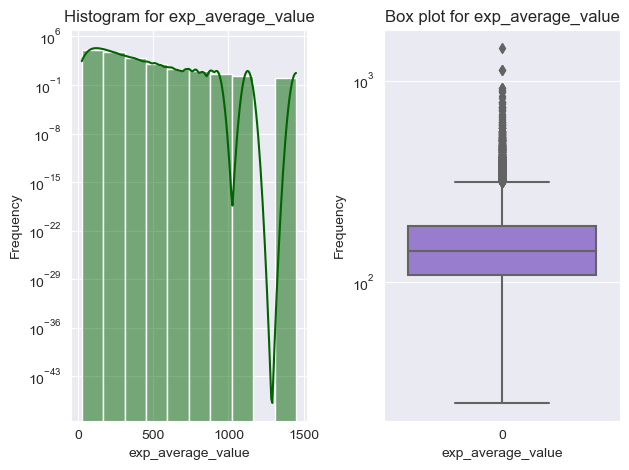

135.688573    22
82.279911     21
92.961644     21
130.347707    21
87.620777     20
              ..
233.147447     1
95.461169      1
258.100291     1
81.889373      1
172.647457     1
Name: exp_average_value, Length: 17747, dtype: int64


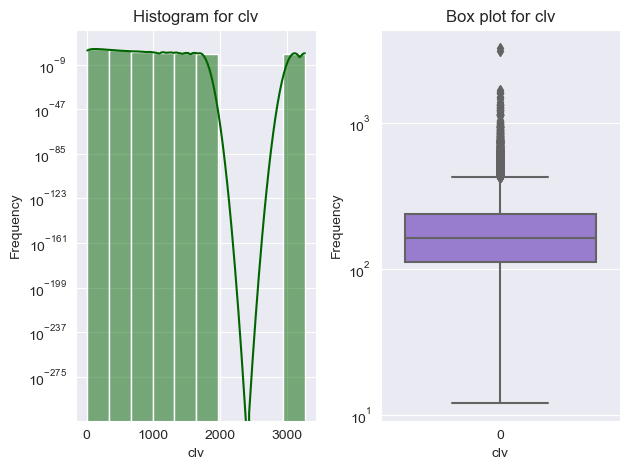

115.660051    2
88.054522     2
106.912230    2
70.140254     2
108.229270    2
             ..
223.906129    1
241.887206    1
196.908659    1
104.502525    1
120.370050    1
Name: clv, Length: 19930, dtype: int64


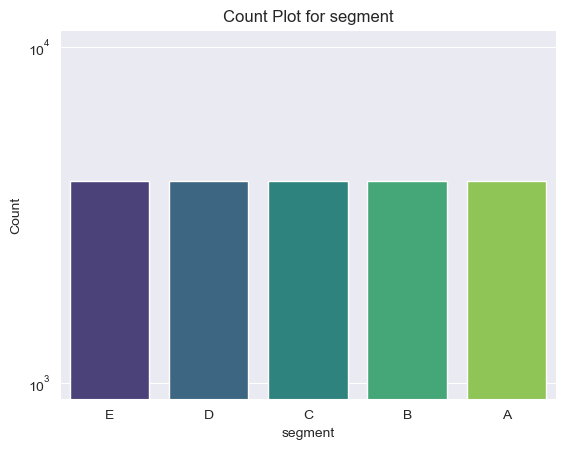

E    3989
D    3989
C    3989
B    3989
A    3989
Name: segment, dtype: int64


In [19]:
def summary_plots(df, num_cols=None, cat_cols=None, log_scale=False):
    """
    Generate summary plots for numerical and categorical columns in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - num_cols (list, optional): List of numerical column names. Defaults to None.
    - cat_cols (list, optional): List of categorical column names. Defaults to None.
    """

    # Plot histograms and box plots for numerical columns
    if num_cols is not None:
        for col in num_cols:
            # Create subplots for histograms and boxplots
            fig, axes = plt.subplots(1, 2)

            # Histogram
            sns.histplot(df[col], bins=10, kde=True, color='darkgreen', ax=axes[0])
            axes[0].set_title(f'Histogram for {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')
            axes[0].set_yscale('log') if log_scale == True else _

            # Box plot
            sns.boxplot(df[col], color='mediumpurple', ax=axes[1])
            axes[1].set_title(f'Box plot for {col}')
            axes[1].set_xlabel(col)
            axes[1].set_ylabel('Frequency')
            axes[1].set_yscale('log') if log_scale == True else _

            # Adjust layout
            plt.tight_layout()

            # Show the plots
            plt.show()

            # Display the counts of unique values in the column
            print(df[col].value_counts())

    # Plot count plots for categorical columns
    if cat_cols is not None:
        for col in cat_cols:
            sns.countplot(x=col, data=df, palette='viridis')
            plt.title(f'Count Plot for {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.yscale('log') if log_scale == True else _

            # Show the plots
            plt.show()

            # Display the counts of unique values in the column
            print(df[col].value_counts())


# Generate summary plots for numerical and categorical columns
summary_plots(clv, num_cols, cat_cols, log_scale=True)

# 4. Data Analysis 

In [20]:
# Display the customers with highest CLVs
clv.sort_values(by='clv', ascending=False).head()

,customer_id,recency_clv_weekly,t_weekly,frequency,monetary_clv_avg,exp_sales_6_months,exp_average_value,clv,segment
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,2.857143,8.571429,4,1401.770500,2.148354,1449.029994,3266.260795,A
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,6.142857,13.857143,11,758.043727,3.867073,767.318384,3113.333694,A
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,51.714286,101.714286,7,1106.467143,1.432679,1127.611524,1695.025379,A
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,74.285714,75.285714,16,501.845063,3.096609,506.137747,1644.457933,A
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.714286,68.000000,52,166.215788,9.198911,166.703404,1608.972233,A


In [21]:
# Calculate the mean values of recency, frequency, monetary and CLV by customer segment
clv.groupby('segment')[['recency_clv_weekly', 'frequency', 'monetary_clv_avg', 'clv']].agg('mean').sort_values(by='clv',
                                                                                                               ascending=False)

,recency_clv_weekly,frequency,monetary_clv_avg,clv
segment,,,,
A,66.294847,6.923038,239.993160,386.086347
B,77.529671,5.295563,172.017985,221.257668
C,88.047380,4.792680,142.399507,164.834317
D,97.402500,4.163951,116.879071,121.589739
E,147.043083,3.715468,89.205231,73.280818
